# PS 3
## Question 1: Unsupervised Linear Models

**Your Name:** Gino Rospigliosi

**People I discussed this question with:** None

## Toy Dataset
For this problem, you will use the data file hb.csv. The input is 2,280 data points, each of which is 7
dimensional (i.e., input csv is 2280 rows by 7 columns). Use Principal Component Analysis
(either an existing library, or through your own implementation by taking the SVD of the
Covariance Matrix) for the follow tasks.

In [64]:
%matplotlib inline
import pandas
data = pandas.read_csv('hb.csv',header=None)
#data.head()

### Task 1
Assuming that the 7-dimensional space is excessive, you would like to reduce the dimension of the space. However, what dimensionality of space should we reduce it to? To determine this we need to compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

Note: this information content is called the “explained variance” of each component, but you can also get this from the magnitude of the singular values. This plot is sometimes called a “Scree Plot”. 

Oringal Data:
[[ -7.14   -6.556  -2.047 ...   4.874  -3.164  -6.855]
 [ -9.427 -22.52   19.141 ...  -3.3     7.729 -17.906]
 [-15.257 -31.008  22.409 ...  -1.522   7.838 -25.506]
 ...
 [  8.403  21.864 -19.883 ...   4.199  -8.427  17.104]
 [ -2.354 -20.119  27.617 ... -11.003  14.378 -13.729]
 [-12.604 -30.831  26.728 ...  -4.919  10.953 -24.401]]
Singular Value Decomposition:
U: (2280, 7)
S: (7, 7)
V: (7, 7)
S =
[[1608.236    0.       0.    ...    0.       0.       0.   ]
 [   0.     869.798    0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]]
U=
[[-0.002 -0.015  0.008 ... -0.036 -0.022 -0.012]
 [-0.022 -0.011  0.033 ...  0.    -0.006  0.023]
 [-0.029 -0.021 -0.026 ...  0.005 -0.024 -0.016]
 ...
 [ 0.022  0.008 -0.028 ...  0.032 -0.035  0.009]
 [-0.02

Text(0.5, 1.0, 'SVD')

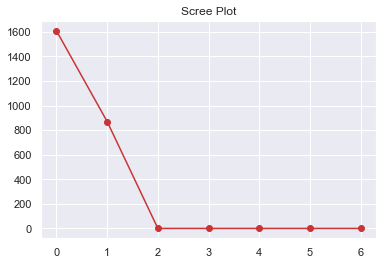

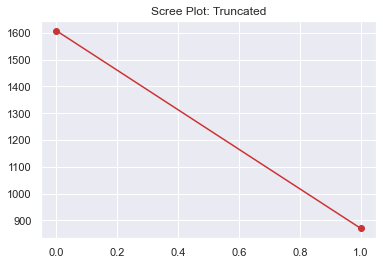

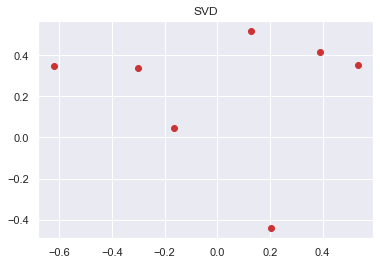

In [71]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette("Set1", 8, .75)
sns.set_color_codes()

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=5)

data=np.matrix(data)
#Print Original Data
print('Oringal Data:'); print(data)

#Singular Value Decomposition
#X=USV, where U and V are ortogonal and S is diagonal
data=np.matrix(data)
print('Singular Value Decomposition:')
U,s,V = np.linalg.svd(data,full_matrices=False) 
S = np.diag(s)
print('U:', U.shape)
print('S:', S.shape) 
print('V:', V.shape) 
print('S ='); print(S)
print('U='); print(U)
print('U*U.T ='); print(U*U.T)
print('V ='); print(V)

#Truncated Singular Value Decomposition
#This is based off zero values in matrix S
print('Truncated Singular Value Decomposition:')
Ut = U[:,0:2]
St = S[:,0:2]
St = St[0:2,:]
Vt = V[0:2,:]
print('Ut='); print(Ut)
print('St='); print(St)
print('Ut*U.T='); print(Ut*Ut.T)
print('Vt ='); print(Vt)

#Compare Decomposition to Orignal Data
print('Does it produce the same data:')
print('U*S*V ='); print(U*S*V)
print('Ut*St*Vt ='); print(Ut*St*Vt)
print('Original Data:'); print(data);
print('True')

#Plot Magnitude of Singular Values/Scree Plot/Explained Variance
fig = plt.figure(0)
plt.plot(np.diag(S),'o-')
plt.title("Scree Plot")
fig = plt.figure(1)
plt.plot(np.diag(St),'o-')
plt.title("Scree Plot: Truncated")
fig = plt.figure(2)
#Plot SVD
x=Vt[0,:]
X=np.array(x)
y=Vt[1,:]
Y=np.array(y)
plt.scatter(X,Y)
plt.title("SVD")

**Question:** Approximately how many components dominate the space?, and what does this tell us about the intrinsic dimensionality of the space?

**Response**: Approximately 2 components dominate the space, therefore the intrinsic dimensionality of the space is K=2

### Task 2
Now use PCA to project the 7-dimensional points on the K-dimensional space (where K is your answer from above) and plot the points. (For K=1,2, or 3, use a 1, 2, or 3D plot, respectively. For 4+ dimensions, use a grid of pairwise 2D Plots, like the Scatter Matrix we used in class).

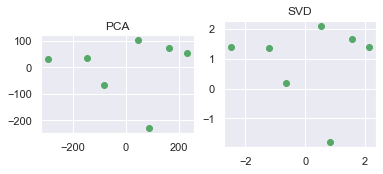

In [97]:
from sklearn.decomposition import PCA
def plot_ax(ax,X,title=None):
    ax.scatter(X[0].flat, X[1].flat,c='g')
    if(title):
        plt.title(title)   
pca = PCA(n_components=2).fit_transform(data.T)
pca = np.matrix([[-0.07,0],[0,-0.1]])*pca.T #Scaling/flipping
fig = plt.figure(2)
plot_ax(fig.add_subplot(121, aspect='equal'), 4*pcaY, 'PCA')
plot_ax(fig.add_subplot(122, aspect='equal'),  4*Vt, 'SVD')
plt.show()

**Question:** What do you notice?

**Response**: SVD and PCA are the same besides scaling and flipping which are dependent on transformation parameters

## Topology Optimization Dataset (Required for ENME 743 , Optional for 440)
For this problem, you will be using unsupervised linear models to help understand and interpret the results of a mechanical optimization problem. Specifically, to understand the solution space generated by a topology optimization code; that is, the results of finding the optimal geometries for minimizing the compliance of various bridge structures with different loading conditions. The input consists of 1,000 images of optimized material distribution for a beam as described in *Figure 1*. A symmetrical boundary condition, left side, is used to reduce the analysis to only half. Also, a rolling support is included at the lower right corner. Notice that the rolling support is the only support in the vertical direction. 

&nbsp;

![](beam_description.jpg)
<center>Figure 1: Left: Nx-by-Ny design domain for topology optimization problem. Right: Example loading configuration and resulting optimal topology. Two external forces, Fi, were applied to the beam at random nodes represented by (xi, yi) coordinates.<sup>1</sup></center>

&nbsp;

Use Principal Component Analysis (either an existing library, or through your own implementation by taking the SVD of the Covariance Matrix) for the follow tasks.

<sup>1. This problems data is based on the problem setup seen in the following paper: Ulu, E., Zhang, R., & Kara, L. B. (2016). A data-driven investigation and estimation of optimal topologies under variable loading configurations. *Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization*, 4(2), 61-72.</sup>

Image is 217 pixels high and 434 pixels wide
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


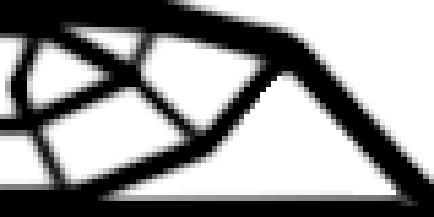

In [14]:
# To help you get started, the below code will load the images from the associated image folder:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

im_dir = './topo_opt_runs/'

images = []
for filename in os.listdir(im_dir):
    try:
        img = Image.open(im_dir+filename).convert('L')
        images.append(np.asarray(img))
    except:
        pass

height,width = images[0].shape
print('The images are {:d} pixels high and {:d} pixels wide'.format(height,width))

# Print matrix corresponding to the image:
print(images[-1])
# And show example image, so you can see how matrix correponds:
img

217

### Task 1: Scree/Singular Value Plot
As with the toy example, assume that the 94,178-dimensional space is excessive. You would like to reduce the dimension of the image space. First compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

**Question:** Approximately how many components dominate the space? What does this tell us about the intrinsic dimensionality of the space?

**Response**:

### Task 2: Principal Components
Now plot the first 5 principal components.

Hint: You will have to generate a One Hot Enconding vector for each principal component. Later, use the function *inverse_transform()* to obtain the image as a vector (length 94,178), which you will have to reshape into the original image dimensions to plot (217 pixels high and 434 pixels wide).

**Question:** Looking at each of these top 5 principal components, what does each component represent (physically, in terms of what it means for where material in the bridge is placed)? What is the key difference between the 1st and 2nd principal component? 

**Response**:

### Task 3: Image Reconstruction
After the dimensionality reduction has been performed (using the K you find in Task 2), reconstruct the first 5 images from the dataset and plot them against the original images. That is, first, (A) plot the original image itself and then (B) project the original image onto its principal components (i.e., translate from image space to PCA space), and (C) un-project/inverse-transform the PCA coordinates back into image space and plot the resulting image.

Hint: The unprojected image should bear some resemblance to the original image but not be 100% the same.

**Question:** By visual examination, how do the original images compare to those that are reconstructed? Which (if any) parts of the bridge structures in the original images appear harder to reconstruct accurate? Which parts are easier to reconstruct? Why is this?

**Response**:

### Task 4: Projection Plot
Now use PCA to project the images on the 2-dimensional space (the first 2 principal components) and plot a 50 random images. (If you try to plot all the data it will be unwieldy, so just randomly subsample 50 of the datapoints). 

Hint: Your plot should look similar to something like Figure 2:

<img src="plot.png" alt="Drawing" style="width: 400px;"/>
<center>Figure 2: Images projected on the reduced 2-dimensional space.</center>

&nbsp;


In [ ]:
# Your Code here

**Question:** One purpose of PCA is to help project similar data near one another, and disimilar points further away. Is this true in this case? Are close images similar or dissimilar in any discernable way? (If so, describe how so.)

**Response**:

## Appendix: Helpful Plotting Functions
The below code demonstrates how to plot images on a 2D plane given coordinates.

(-1, 1)

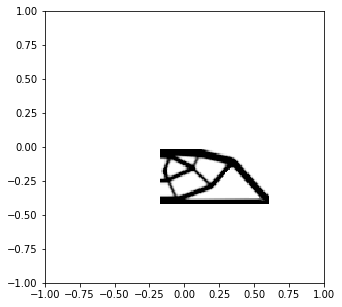

In [19]:
# To help with some of the image plotting on a 2D plane, you can use Offset Image
# as shown below, or you can use your own method if you prefer as long as it is clear
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# Create Figure and Axis Object
fig,ax = plt.subplots(1, 1,figsize=(5,5))
# This creates a box that loads an image into it
imagebox = OffsetImage(img, zoom=.25,cmap=plt.get_cmap('Greys_r')) 
# AnnotationBbox lets you place the OffsetImage at a given x,y point on the axis
x=0; y=0;
ab = AnnotationBbox(imagebox, [x,y], frameon=False,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")                                  
# Now add the annotation to the axis
ax.add_artist(ab)
ax.set_ylim([-1,1])
ax.set_xlim([-1,1])